In [1]:
import os
import sys
home_dir = "../../"
module_path = os.path.abspath(os.path.join(home_dir))
if module_path not in sys.path:
    sys.path.append(module_path)

import random
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
model_root_and_name_tuple_list = [("dbnsfp", "sift"), ("dbnsfp", "polyphen2_HVAR"), ("dbnsfp", "cadd"), ("dbnsfp", "mvp"), ("dbnsfp", "metarnn"), ("dbnsfp", "revel"),
                                  ("tape_rao", "unirep"), ("tape_rao", "protbert"), ("sequnet_dunham", "sequnet"), 
                                  ("esm_rives", "esm1b_t33_650M_UR50S"), ("esm_rives", "esm1v_t33_650M_UR90S"), ("esm_rives", "esm2_t33_650M_UR50D"),
                                  ("bioembeddings_dallago", "plus_rnn"), 
                                  ("bioembeddings_dallago", "prottrans_bert_bfd"), ("bioembeddings_dallago", "prottrans_albert_bfd"),
                                  ("bioembeddings_dallago", "prottrans_xlnet_uniref100"), 
                                  ("bioembeddings_dallago", "prottrans_t5_bfd"), ("bioembeddings_dallago", "prottrans_t5_uniref50"), ("bioembeddings_dallago", "prottrans_t5_xl_u50"),
                                  ("vespa_marquet", "vespal"), 
                                  ("", "random_classifier"), ("", "conservation")]
models_smaller_means_damaging = ["sequnet", "sift"]

In [57]:
result_df = pd.read_csv(home_dir+f"models/aa_common/merged_predictions/popu_freq_analysis.csv", sep="\t")
result_df = result_df[~pd.isna(result_df["conservation_pred"])]  # taking df for only non-NAN values

result_df = result_df[(result_df["class"]!="Zero-population") & (result_df["class"]!="Singleton")]
# print(result_df.shape)
# print(result_df.columns)
print(result_df["class"].value_counts())

# n_samples = 10000
# common = result_df[result_df["class"]=="Common"].sample(n=min(n_samples, result_df[result_df["class"]=="Common"].shape[0]))
# rare = result_df[result_df["class"]=="Rare"].sample(n=n_samples)
# ultra_rare = result_df[result_df["class"]=="Ultra-rare"].sample(n=n_samples)
# # result_df = result_df[(result_df["class"]=="Common") | (result_df["class"]=="Rare") | (result_df["class"]=="Ultra-rare")]
# result_df = pd.concat([common, rare, ultra_rare])
result_df.columns

Ultra-rare    138540
Rare           11363
Common          7032
Name: class, dtype: int64


Index(['snp_id', 'chrom_acc_version', 'chrom_pos', 'ref_allele', 'alt_allele',
       'prot_acc_version', 'prot_pos', 'wt', 'mut', 'wt_population',
       'mut_poulation', 'wt_freq', 'mt_freq', 'class', 'sift_pred',
       'polyphen2_HVAR_pred', 'cadd_pred', 'mvp_pred', 'metarnn_pred',
       'revel_pred', 'unirep_pred', 'protbert_pred', 'sequnet_pred',
       'esm1b_t33_650M_UR50S_pred', 'esm1v_t33_650M_UR90S_pred',
       'esm2_t33_650M_UR50D_pred', 'plus_rnn_pred', 'prottrans_bert_bfd_pred',
       'prottrans_albert_bfd_pred', 'prottrans_xlnet_uniref100_pred',
       'prottrans_t5_bfd_pred', 'prottrans_t5_uniref50_pred',
       'prottrans_t5_xl_u50_pred', 'vespal_pred', 'conservation_pred'],
      dtype='object')

### Conservation vs. mutation allele frequency

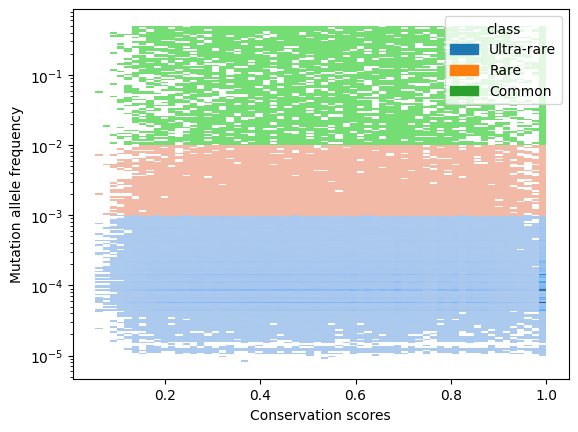

In [59]:
plt.cla()
sns.histplot(data=result_df, x="conservation_pred", y="mt_freq", hue="class", log_scale=(False, True))
plt.xlabel("Conservation scores")
plt.ylabel("Mutation allele frequency")
# plt.show()
plt.savefig(home_dir+f"models/aa_common/conservation_vs_model_preds_plots/conservation_vs_mt_freq.png", dpi=300, format="png", bbox_inches='tight', pad_inches=0.0)

### Conservation vs. models predictions

sift


/tmp/ipykernel_3485999/4185235986.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_nan_result_df.loc[non_nan_result_df["pred"]<=th, "class_numeric_assigned"] = 1


	 1.0 1.0
polyphen2_HVAR


/tmp/ipykernel_3485999/4185235986.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_nan_result_df.loc[non_nan_result_df["pred"]<=th, "class_numeric_assigned"] = 1


	 1.0 1.0
cadd


/tmp/ipykernel_3485999/4185235986.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_nan_result_df.loc[non_nan_result_df["pred"]<=th, "class_numeric_assigned"] = 1


	 0.5 0.9920273348519362
mvp


/tmp/ipykernel_3485999/4185235986.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_nan_result_df.loc[non_nan_result_df["pred"]<=th, "class_numeric_assigned"] = 1


	 1.0 1.0
metarnn


/tmp/ipykernel_3485999/4185235986.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_nan_result_df.loc[non_nan_result_df["pred"]<=th, "class_numeric_assigned"] = 1


	 0.86 0.9902264212412445
revel


/tmp/ipykernel_3485999/4185235986.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_nan_result_df.loc[non_nan_result_df["pred"]<=th, "class_numeric_assigned"] = 1


	 0.8300000000000001 0.9900087642418931
unirep
	 0.81 0.9921786120591581
protbert
	 0.62 0.9927474402730375
sequnet


/tmp/ipykernel_3485999/4185235986.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_nan_result_df.loc[non_nan_result_df["pred"]<=th, "class_numeric_assigned"] = 1


	 0.97 0.9910358565737052
esm1b_t33_650M_UR50S
	 0.78 0.9903299203640501
esm1v_t33_650M_UR90S
	 0.76 0.9907565415244596
esm2_t33_650M_UR50D
	 0.78 0.9904721274175199
plus_rnn
	 0.75 0.9903299203640501
prottrans_bert_bfd
	 0.74 0.9900455062571104
prottrans_albert_bfd
	 0.74 0.9906143344709898
prottrans_xlnet_uniref100
	 0.75 0.9900455062571104
prottrans_t5_bfd
	 0.87 0.9940273037542662
prottrans_t5_uniref50
	 0.87 0.9933162684869169
prottrans_t5_xl_u50
	 0.85 0.9916097838452788
vespal


/tmp/ipykernel_3485999/4185235986.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_nan_result_df.loc[non_nan_result_df["pred"]<=th, "class_numeric_assigned"] = 1


	 0.98 0.9943877551020408
random_classifier
	 0.99 0.9900455062571104


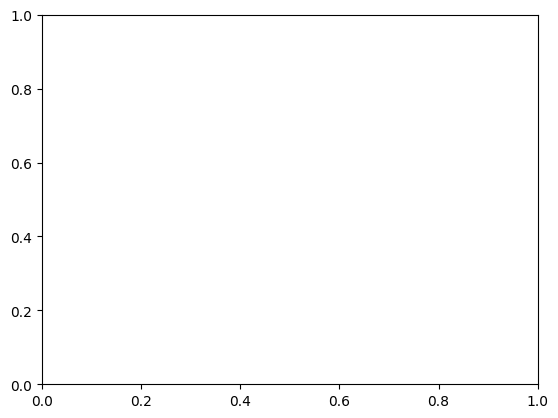

In [61]:
def do_hist_plot(non_nan_result_df, model_name):
    
    sns.histplot(data=non_nan_result_df, x="conservation_pred", y="pred", hue="class")

    plt.xlabel("Conservation scores (scaled)")
    plt.ylabel(f"{model_name}-scores (scaled)")
    # plt.show()
    plt.savefig(home_dir+f"models/aa_common/conservation_vs_model_preds_plots/{model_name}.png", dpi=300, format="png", bbox_inches='tight', pad_inches=0.0)


model_pred_col = "conservation_pred"
result_df[model_pred_col]=(result_df[model_pred_col]-result_df[model_pred_col].min())/(result_df[model_pred_col].max()-result_df[model_pred_col].min()) # scaling prediction scores between [0, 1]

def get_non_nan_df(df, col_name):
    non_nan_df = df[~pd.isna(df[col_name])]  # taking df for only non-NAN values
    return non_nan_df

for i, (model_root, model_name) in enumerate(model_root_and_name_tuple_list):
    plt.cla()
    # model_name = "esm2_t33_650M_UR50D"
    if model_name=="conservation": continue

    print(model_name)
    model_pred_col = model_name + "_pred"

    if model_name=="random_classifier": 
        result_df[model_pred_col] = [random.uniform(0,1) for i in range(result_df.shape[0])]

    result_df.loc[result_df["class"]=="Common", "class_numeric"] = 1
    result_df.loc[result_df["class"]!="Common", "class_numeric"] = 0

    result_df["pred"]=(result_df[model_pred_col]-result_df[model_pred_col].min())/(result_df[model_pred_col].max()-result_df[model_pred_col].min()) # scaling prediction scores between [0, 1]

    non_nan_result_df = get_non_nan_df(result_df, model_pred_col)

    # finding a th such that >99% of the common variants are correctly classified
    best_th = 0.0
    for th in np.arange(0, 1.1, .01):
        non_nan_result_df.loc[non_nan_result_df["pred"]<=th, "class_numeric_assigned"] = 1
        non_nan_result_df.loc[non_nan_result_df["pred"]>th, "class_numeric_assigned"] = 0

        temp_df = non_nan_result_df[non_nan_result_df["class"]=="Common"]
        n_rows_annotated_as_common = temp_df[temp_df["class_numeric"]==temp_df["class_numeric_assigned"]]
        percentage = n_rows_annotated_as_common.shape[0]/temp_df.shape[0]
        if percentage >= .99:
            print("\t", th, percentage)
            best_th = th
            break
    plt.axhline(y=best_th, color='r', linestyle='dashed')
    plt.text(0.7, best_th-.05, f"th={best_th:.2f}", c="r")
    # if model_name in models_smaller_means_damaging:
    #     non_nan_result_df['pred'] = non_nan_result_df['pred'].multiply(-1)

    do_hist_plot(non_nan_result_df, model_name)
    # break